## CNN tests

Here I show how to use functions from 'CNN_models.py'.

The script 'test_models.py' uses the same syntax

In [3]:
%run -i 'preprocess.py'
from preprocess import *
from CNN_models import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
!pip list | grep tensorflow

tensorflow          1.8.0    


In [4]:
!pip install tensorflow-gpu==1.4.1

    100% |████████████████████████████████| 170.3MB 19kB/s  eta 0:00:01 2% |▉                               | 4.4MB 9.1MB/s eta 0:00:19    5% |██                              | 10.1MB 21.2MB/s eta 0:00:08    21% |███████                         | 36.7MB 53.1MB/s eta 0:00:03    34% |███████████                     | 58.1MB 54.1MB/s eta 0:00:03    95% |██████████████████████████████▌ | 162.6MB 65.1MB/s eta 0:00:01
    100% |████████████████████████████████| 1.7MB 3.7MB/s eta 0:00:01


In [44]:
labels, _, _ = get_labels()
labels

['backward',
 'bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'follow',
 'forward',
 'four',
 'go',
 'happy',
 'house',
 'learn',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'visual',
 'wow',
 'yes',
 'zero']

In [45]:
# Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

# Feature dimension
feature_dim_1 = 20
feature_dim_2 = 11
channel = 1
epochs = 50
batch_size = 100
verbose = 1
num_classes = len(labels) # 35 without background noise

In [46]:
# Reshaping to perform 2D convolution, which is spatial convolution over images
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [ ]:
!nvidia-smi

In [47]:
# taking a subset
n = 300
X_train = X_train[:n]
X_test = X_test[:n//2]
y_train_hot = y_train_hot[:n]
y_test_hot = y_test_hot[:n//2]

model_1 = model_1()
model_1.fit(X_train, y_train_hot, batch_size=batch_size, epochs=30, verbose=verbose, validation_data=(X_test, y_test_hot))

Train on 300 samples, validate on 150 samples
Epoch 1/30
300/300 [==============================] - 1s 2ms/step - loss: 6.3402 - acc: 0.0233 - val_loss: 4.1613 - val_acc: 0.0333
Epoch 2/30
300/300 [==============================] - 0s 505us/step - loss: 4.1944 - acc: 0.0300 - val_loss: 3.6185 - val_acc: 0.0333
Epoch 3/30
300/300 [==============================] - 0s 484us/step - loss: 3.6854 - acc: 0.0467 - val_loss: 3.5834 - val_acc: 0.0133
Epoch 4/30
300/300 [==============================] - 0s 481us/step - loss: 3.6195 - acc: 0.0500 - val_loss: 3.5513 - val_acc: 0.0400
Epoch 5/30
300/300 [==============================] - 0s 463us/step - loss: 3.5552 - acc: 0.0333 - val_loss: 3.5556 - val_acc: 0.0333
Epoch 6/30
300/300 [==============================] - 0s 424us/step - loss: 3.5473 - acc: 0.0567 - val_loss: 3.5651 - val_acc: 0.0067
Epoch 7/30
300/300 [==============================] - 0s 414us/step - loss: 3.5205 - acc: 0.0600 - val_loss: 3.5904 - val_acc: 0.0467
Epoch 8/30
300/300

In [48]:
model_2 = model_2()
model_2.fit(X_train, y_train_hot, batch_size=batch_size, epochs=10, verbose=verbose, validation_data=(X_test, y_test_hot))

How to interpret validation loss and accuracy: https://github.com/keras-team/keras/issues/3755

### Saving a model
https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [68]:
save_model(model_1,'model_1')

Saved model to disk


## Plot accuracy and loss from trained model

In [52]:
model_1.history.history

{'val_loss': [4.161268393198649,
  3.6185030937194824,
  3.583391030629476,
  3.551316261291504,
  3.555641015370687,
  3.5651400089263916,
  3.5904428958892822,
  3.545081615447998,
  3.539339542388916,
  3.5356224377950034,
  3.5310659408569336,
  3.52516508102417,
  3.540895462036133,
  3.5257839361826577,
  3.516409158706665,
  3.5003585815429688,
  3.546294371287028,
  3.5030807654062905,
  3.5049315293629966,
  3.52286688486735,
  3.4982986450195312,
  3.5183610916137695,
  3.5013561248779297,
  3.5031421184539795,
  3.5132869879404702,
  3.5638996760050454,
  3.50667937596639,
  3.521624803543091,
  3.4529008865356445,
  3.4785029888153076],
 'val_acc': [0.033333332588275276,
  0.033333332588275276,
  0.01333333303531011,
  0.040000000347693764,
  0.033333332588275276,
  0.006666666517655055,
  0.046666666865348816,
  0.019999999552965164,
  0.01333333303531011,
  0.01333333303531011,
  0.01333333303531011,
  0.033333332588275276,
  0.05333333214124044,
  0.08666666597127914,
  

In [2]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

## Submitted jobs

In [1]:
%run -i 'CNN_models.py'

Using TensorFlow backend.


In [2]:
loaded_model, history = load_model('model_1')
print(loaded_model)

Loaded model from disk


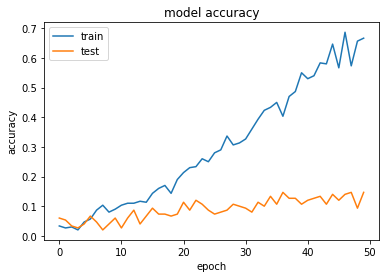

In [3]:
plot_accuracy(history)

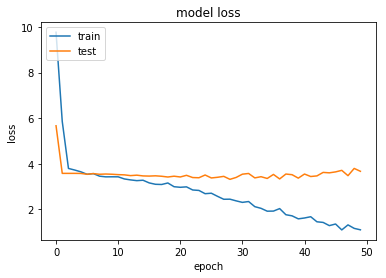

In [4]:
plot_loss(history)

In [5]:
loaded_model, history = load_model('model_2')
print(loaded_model)

Loaded model from disk


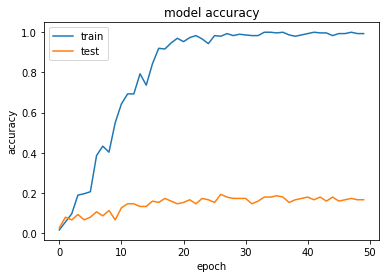

In [6]:
plot_accuracy(history)

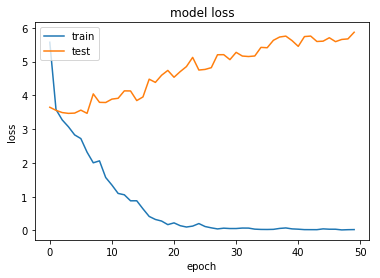

In [7]:
plot_loss(history)

Loaded model from disk


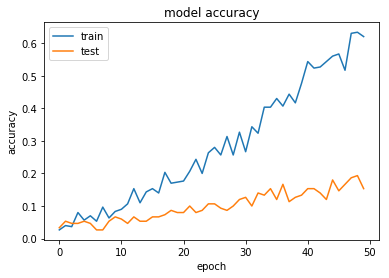

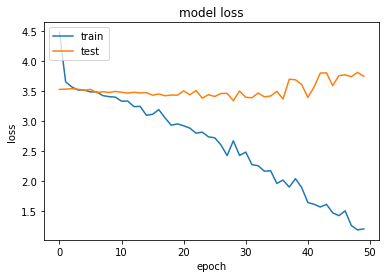

In [9]:
loaded_model, history = load_model('model_3')
plot_accuracy(history)
plot_loss(history)

### Now on 32x32 spectrograms

In [1]:
%run -i 'CNN_models.py'

Using TensorFlow backend.


Loaded model from disk


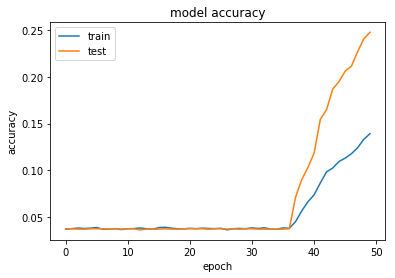

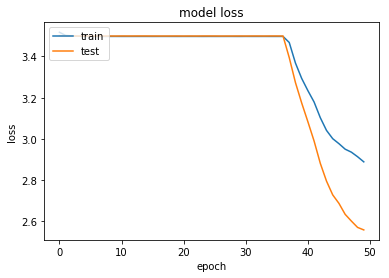

In [5]:
loaded_model, history = load_model('model_4_32')
plot_accuracy(history)
plot_loss(history)

questo è proprio pessimo... aspetto gli altri

Loaded model from disk


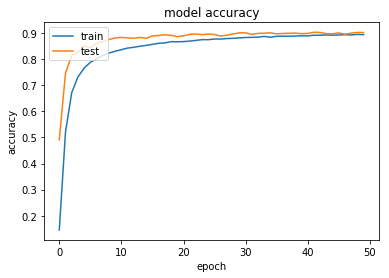

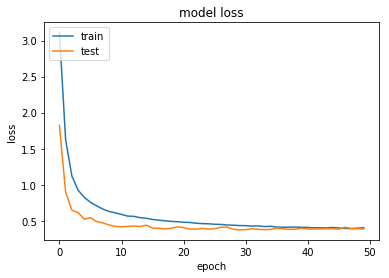

In [6]:
loaded_model, history = load_model('model_1_32')
plot_accuracy(history)
plot_loss(history)

Loaded model from disk


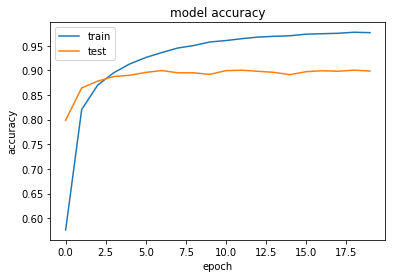

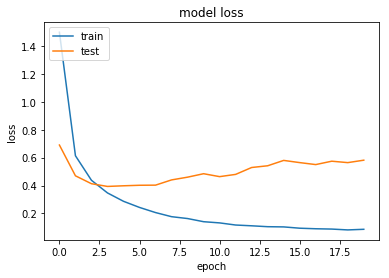

In [3]:
# job 102242
loaded_model, history = load_model('model_2_32')
plot_accuracy(history)
plot_loss(history)

Loaded model from disk


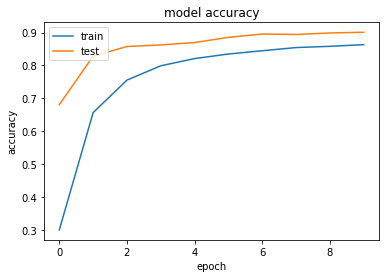

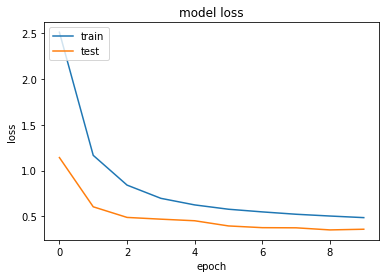

In [4]:
# job 102274
loaded_model, history = load_model('model_3_32')
plot_accuracy(history)
plot_loss(history)

Loaded model from disk


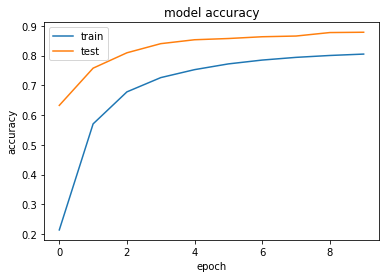

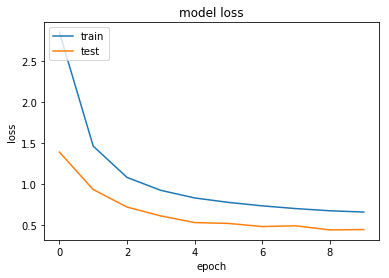

In [6]:
# job 102281
loaded_model, history = load_model('model_4_32')
plot_accuracy(history)
plot_loss(history)